<a href="https://colab.research.google.com/github/Niktej8/PRACTICE/blob/main/PySPARK_EVERYTHING_TO_PRACTICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-11-jdk -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  at-spi2-core fonts-dejavu-core fonts-dejavu-extra gsettings-desktop-schemas
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libxcomposite1 libxt-dev libxtst6 libxxf86dga1
  openjdk-11-jdk-headless openjdk-11-jre openjdk-11-jre-headless
  session-migration x11-utils
Suggested packages:
  libxt-doc openjdk-11-demo openjdk-11-source visualvm libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  | fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  at-spi2-core fonts-dejavu-core fonts-dejavu-extra gsettings-desktop-schemas
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libxcomposite1 libxt-dev libxtst6 libxxf86dga1
  openjdk-11-jdk openjdk-11-jdk-headless openjdk-

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("RDD'S").getOrCreate()


## Parallelize - Convert list to RDDS

In [ ]:

a = spark.sparkContext.parallelize([1,2,3,4,5,6,7,8,9,10])

## Collect()

In [ ]:
a.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Count()

In [ ]:
a.count()

10

## Filter()

In [ ]:
a.filter(lambda x : x%2==0).collect()

[2, 4, 6, 8, 10]

## Map()

In [ ]:
a.map(lambda x : x**2).collect()

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

## Reduce()

In [ ]:
a.reduce(lambda x,y:x+y)

55

## countbyvalue()
✅ Use it when:
You are working with an RDD of single elements (not key-value), like just strings or numbers.
You want to count how many times each unique value appears.

In [ ]:
a.countByValue()

defaultdict(int, {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1})

## countByKey()
✅ Use it when:
You are working with an RDD of key-value pairs (i.e., an RDD like ("user1", "page1"), etc.)
You want to count how many times each key appears.

In [ ]:
# a.map(lambda x:(x,1)).collect()
a.map(lambda x:(x,1)).countByKey()

defaultdict(int, {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1})

##  reduceByKey()
✅ Use it when:
You have an RDD of (key, value) pairs, and you want to reduce values for each key separately.

In [ ]:
rdd = spark.sparkContext.parallelize([("a", 1), ("b", 2), ("a", 3), ("b", 4)])
result = rdd.reduceByKey(lambda a, b: a + b).collect()
print(result)  # Output: [('a', 4), ('b', 6)]

[('b', 6), ('a', 4)]


In [ ]:

# text_rdd = spark.sparkContext.textFile("pk.txt")

In [ ]:
text_rdd.flatMap(lambda x : x.split(' ')).collect()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/content/pk.txt
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:304)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:244)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:332)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:208)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:294)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:290)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:294)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:290)
	at org.apache.spark.api.python.PythonRDD.getPartitions(PythonRDD.scala:57)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:294)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:290)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:195)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.io.IOException: Input path does not exist: file:/content/pk.txt
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:278)
	... 34 more


## mapValues()
✅ Use it when:
You have an RDD of (key, value) pairs, and you want to transform only the value, leaving the key unchanged.

In [ ]:
rdd = spark.sparkContext.parallelize([("a", 1), ("b", 2)])
rdd.mapValues(lambda x:x*100).collect()


## flatMapValues()
✅ Use it when:
You have an RDD of (key, value) pairs, and each value is a collection (like a list or string), and you want to keep the key but "explode" the value into multiple items.

It’s like mapValues() + flattening.

In [ ]:
rdd = spark.sparkContext.parallelize([("user1", "apple orange banana"), ("user2", "grapes banana")])
rdd.flatMapValues(lambda x:x.split(" ")).collect()

## Distinct()

In [ ]:
b = spark.sparkContext.parallelize([1,1,2,3,3,3,2,4,5])
b.distinct().collect()

## union

In [ ]:
c = spark.sparkContext.parallelize([6,7,8,2,3,10])
b.union(c).collect()

## intersection(otherRDD)
Returns only elements that are common to both RDDs.

In [ ]:
b.intersection(c).collect()

## subtract(otherRDD)
Returns elements from the source RDD that are not in the second RDD.

In [ ]:
b.subtract(c).collect()

## cartesian(otherRDD)
Returns the Cartesian product (like nested loops).

In [ ]:
cartesian = b.cartesian(c)

## Check how many partitions data is divided

In [ ]:
cartesian.getNumPartitions()

## repartition

In [ ]:
cartesian = cartesian.repartition(10)
cartesian.getNumPartitions()

## Only decrease the partitions not increase

In [ ]:
cartesian = cartesian.coalesce(11)
cartesian.getNumPartitions()

## we can also ZIP the values

In [ ]:
x = spark.sparkContext.parallelize([1,2,3,4,5])
y = spark.sparkContext.parallelize([6,7,8,9,10])
x.zip(y).collect()

## ZIP with Index

In [ ]:
x.zipWithIndex().collect()

## groupBy(func)
What it does: Groups elements in an RDD based on the result of a function you provide. Returns pairs (key, iterable_of_values) where key is the result of your function.

In [ ]:
rdd = spark.sparkContext.parallelize([1, 2, 3, 4, 5, 6])
rdd.groupBy(lambda x : "even" if x%2==0 else "odd").mapValues(lambda x:list(x)).collect()

## groupBykey
What it does: Used on pair RDDs (key-value pairs). Groups all values that share the same key.

In [ ]:
rdd = spark.sparkContext.parallelize([('a', 1), ('b', 2), ('a', 3), ('b', 4), ('c', 5)])
rdd.groupByKey().mapValues(lambda x:list(x)).collect()

## Sort by

In [ ]:
rdd = spark.sparkContext.parallelize([1, 2, 3, 4, 5, 6])
rdd.sortBy(lambda x:x,ascending=False).collect()

## sortby key

In [ ]:
rdd = spark.sparkContext.parallelize([(3, "c"), (1, "a"), (2, "b")])
rdd = rdd.sortByKey()

In [ ]:
rdd.take(2)

## Takesample

replacement either True/False,number, seed

In [ ]:
rdd.takeSample(False,10)

In [ ]:
rdd.takeSample(True,5,seed=8)

In [ ]:
rdd.takeSample(True,5,seed=8)

## Takeordered will get smallest number of elements

In [ ]:
rdd = spark.sparkContext.parallelize([1, 2, 3, 4, 5, 6])
rdd.takeOrdered(2)

## Top n largest elements

In [ ]:
rdd.top(2)

## 	Returns the first element.

In [ ]:
rdd.first()

# Movie Ratings Analytics

movies.txt
movie_id,title,genre
1,Titanic,Romance
2,Avatar,Sci-Fi
3,The Dark Knight,Action
4,Inception,Sci-Fi
5,The Godfather,Crime

----------------------------------
user_id,movie_id,rating
101,1,5
102,2,4
101,3,5
103,1,4
104,2,3
101,4,4
102,5,5
105,4,5
106,3,3

## Read both files using textFile() and parse each line (skip headers).

In [ ]:
movies = spark.sparkContext.textFile("movies.txt")
ratings = spark.sparkContext.textFile("ratings.txt")
header1 = movies.first()
header2 = ratings.first()
movies = movies.filter(lambda x : x != header1)
ratings = ratings.filter(lambda x : x != header2)

In [ ]:
ratings_j = ratings.map(lambda x : (x.split(',')[1],
 (x.split(',')[0],x.split(',')[2])))
movies_j = movies.map(lambda x : (x.split(',')[0],
 (x.split(',')[1],x.split(',')[2])))

In [ ]:
movies_joined = movies_j.leftOuterJoin(ratings_j)

In [ ]:
movies_joined.map(lambda x: (x[1][0][0],(x[0],x[1][0][1],x[1][1][0],x[1][1][1])))

In [ ]:
movie_rating = movies_joined.map(lambda x: (x[1][0][0],int(x[1][1][1])))
movie_rating.groupByKey().mapValues(lambda x : sum(x)/len(x)).sortBy(lambda x :x[1],ascending = False).take(3)

In [ ]:
movies_joined.map(lambda x : (x[1][0][1],1)).reduceByKey(lambda x,y : x+y).sortBy(lambda x :x[1],ascending = False).collect()

In [ ]:
ratings.collect()

In [ ]:
ratings.map(lambda x : (x.split(",")[0],1)).groupByKey().mapValues(lambda x:sum(x)).filter(lambda x : x[1]>2).collect()

In [ ]:
movies.map(lambda x : x.split(",")[2]).distinct().collect()

In [ ]:
movies.zipWithIndex().collect()

In [ ]:
movie_rating.groupByKey().mapValues(lambda x : x).collect()

In [ ]:
movies_joined.mapValues(lambda x : x.split(',')).collect

In [ ]:
r1 = ratings.map(lambda x:(int(x.split(",")[1]),(x.split(',')[0],x.split(",")[2])))

In [ ]:
m1.collect()

In [ ]:
r1.collect()

In [ ]:
joined  = r1.join(m1)

In [ ]:
joined.collect()

# Create a pyspark dataframe by using list of tuples

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("Practice").getOrCreate()

In [ ]:
data = [('Nikhil',25),("Raghava",26),('Surya',23)]
columns = ['Name','Age']

df = spark.createDataFrame(data,columns)

## List of Dictionaries

In [ ]:
data = [{"name":"Nikhil","Age":25},{"name":"Raghava",'Age':23}]

df = spark.createDataFrame(data)

In [ ]:
df.show()

In [ ]:
data = [(1,'a'),(2,'b'),(3,'c')]

rdd = spark.sparkContext.parallelize(data)

In [ ]:
import pandas as pd

df =pd.read_excel("DAILY_NOTES.xlsx")

In [ ]:
spark.createDataFrame(df).show()

In [ ]:
titanic = spark.read.format('parquet').load('titanic.parquet')

In [ ]:
from pyspark.sql.types import *
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True)])
spark.createDataFrame([('Alice', 1)], schema).show()


In [ ]:
titanic.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## show will return top 20 rows

In [ ]:
titanic.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|      

In [ ]:
titanic.take(3) # first 3 rows

[Row(PassengerId=1, Survived=0, Pclass=3, Name='Braund, Mr. Owen Harris', Sex='male', Age=22.0, SibSp=1, Parch=0, Ticket='A/5 21171', Fare=7.25, Cabin=None, Embarked='S'),
 Row(PassengerId=2, Survived=1, Pclass=1, Name='Cumings, Mrs. John Bradley (Florence Briggs Thayer)', Sex='female', Age=38.0, SibSp=1, Parch=0, Ticket='PC 17599', Fare=71.2833, Cabin='C85', Embarked='C'),
 Row(PassengerId=3, Survived=1, Pclass=3, Name='Heikkinen, Miss. Laina', Sex='female', Age=26.0, SibSp=0, Parch=0, Ticket='STON/O2. 3101282', Fare=7.925, Cabin=None, Embarked='S')]

In [ ]:
titanic.tail(2) #last 2 rows

[Row(PassengerId=890, Survived=1, Pclass=1, Name='Behr, Mr. Karl Howell', Sex='male', Age=26.0, SibSp=0, Parch=0, Ticket='111369', Fare=30.0, Cabin='C148', Embarked='C'),
 Row(PassengerId=891, Survived=0, Pclass=3, Name='Dooley, Mr. Patrick', Sex='male', Age=32.0, SibSp=0, Parch=0, Ticket='370376', Fare=7.75, Cabin=None, Embarked='Q')]

In [ ]:
titanic.head()  # first row

Row(PassengerId=1, Survived=0, Pclass=3, Name='Braund, Mr. Owen Harris', Sex='male', Age=22.0, SibSp=1, Parch=0, Ticket='A/5 21171', Fare=7.25, Cabin=None, Embarked='S')

In [ ]:
titanic.columns # for columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
print(titanic.count()) # rows
len(titanic.columns) # columns

891


12

In [ ]:
titanic.dtypes #datatypes

[('PassengerId', 'bigint'),
 ('Survived', 'bigint'),
 ('Pclass', 'bigint'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'double'),
 ('SibSp', 'bigint'),
 ('Parch', 'bigint'),
 ('Ticket', 'string'),
 ('Fare', 'double'),
 ('Cabin', 'string'),
 ('Embarked', 'string')]

In [ ]:
titanic.schema # entire schema

StructType([StructField('PassengerId', LongType(), True), StructField('Survived', LongType(), True), StructField('Pclass', LongType(), True), StructField('Name', StringType(), True), StructField('Sex', StringType(), True), StructField('Age', DoubleType(), True), StructField('SibSp', LongType(), True), StructField('Parch', LongType(), True), StructField('Ticket', StringType(), True), StructField('Fare', DoubleType(), True), StructField('Cabin', StringType(), True), StructField('Embarked', StringType(), True)])

In [ ]:
titanic.printSchema()

root
 |-- PassengerId: long (nullable = true)
 |-- Survived: long (nullable = true)
 |-- Pclass: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: long (nullable = true)
 |-- Parch: long (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [ ]:
titanic.select('Sex','Fare','Cabin').distinct().show() # select distinct sex,fare,cabin columns

+------+--------+-----------+
|   Sex|    Fare|      Cabin|
+------+--------+-----------+
|female|   263.0|C23 C25 C27|
|  male|    79.2|        B86|
|female| 83.1583|        C54|
|  male|    30.5|        C30|
|female|    86.5|        B77|
|female|    57.0|        B20|
|  male|  151.55|    C22 C26|
|female|    90.0|        C93|
|female|    71.0|        B22|
|female|   120.0|    B96 B98|
|female|    39.4|        D28|
|  male|247.5208|    B58 B60|
|  male|   120.0|    B96 B98|
|  male| 81.8583|        A34|
|female| 77.9583|         D9|
|female|    13.0|        F33|
|  male| 52.5542|        D19|
|  male|    30.5|       C106|
|  male|    57.0|        B20|
|female| 76.2917|        D15|
+------+--------+-----------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col,lit,asc,desc,round

In [ ]:
titanic.show(2)

+-----------+--------+------+--------------------+------+----+-----+-----+---------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|   Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+---------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0| PC 17599|71.2833|  C85|       C|
+-----------+--------+------+--------------------+------+----+-----+-----+---------+-------+-----+--------+
only showing top 2 rows



## Add a column and Modify column

In [ ]:
titanic.withColumn('Fare',round(col('Fare'))).show(2)

+-----------+--------+------+--------------------+------+----+-----+-----+---------+----+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|   Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+---------+----+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|A/5 21171| 7.0| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0| PC 17599|71.0|  C85|       C|
+-----------+--------+------+--------------------+------+----+-----+-----+---------+----+-----+--------+
only showing top 2 rows



In [ ]:
titanic_d = titanic.withColumn('Nikhil',col('Fare')*10)

## drop a column and multiple columns

In [ ]:
titanic.drop(col('Sex'),col('Fare')).show()

+-----------+--------+------+--------------------+----+-----+-----+----------------+-----+--------+
|PassengerId|Survived|Pclass|                Name| Age|SibSp|Parch|          Ticket|Cabin|Embarked|
+-----------+--------+------+--------------------+----+-----+-----+----------------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|22.0|    1|    0|       A/5 21171| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|38.0|    1|    0|        PC 17599|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|26.0|    0|    0|STON/O2. 3101282| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|35.0|    1|    0|          113803| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|35.0|    0|    0|          373450| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|NULL|    0|    0|          330877| NULL|       Q|
|          7|       0|     1|McCarthy, Mr. Tim...|54.0|    0|    0|           17463|  E46|       S|


## Rename a columns

In [ ]:
titanic.withColumnRenamed('Fare','Updated_Fare').show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+------------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|Updated_Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+------------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|        7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|     71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|       7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|        53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|        8.05| NULL|       S|
+-----------+--------+------+-----------

## Add Multiple columns

In [ ]:
titanic.withColumns({'fare2':lit(20),'fare3':lit(50)}).show()

# Alias

In [ ]:
titanic.alias('t').show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|      

## conditions

In [ ]:
titanic.where(~ (col('Sex')=='male') & (col('Age')>30)).show()

+-----------+--------+------+--------------------+------+----+-----+-----+------------+--------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|      Ticket|    Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+------------+--------+-----+--------+
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|    PC 17599| 71.2833|  C85|       C|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|      113803|    53.1| C123|       S|
|         12|       1|     1|Bonnell, Miss. El...|female|58.0|    0|    0|      113783|   26.55| C103|       S|
|         16|       1|     2|Hewlett, Mrs. (Ma...|female|55.0|    0|    0|      248706|    16.0| NULL|       S|
|         19|       0|     3|Vander Planke, Mr...|female|31.0|    1|    0|      345763|    18.0| NULL|       S|
|         26|       1|     3|Asplund, Mrs. Car...|female|38.0|    1|    5|      347077| 31.3875| NULL|  

In [ ]:
titanic.where("Age > 30 and Sex == 'male'").show()

+-----------+--------+------+--------------------+----+----+-----+-----+-----------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name| Sex| Age|SibSp|Parch|     Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+----+----+-----+-----+-----------+-------+-----+--------+
|          5|       0|     3|Allen, Mr. Willia...|male|35.0|    0|    0|     373450|   8.05| NULL|       S|
|          7|       0|     1|McCarthy, Mr. Tim...|male|54.0|    0|    0|      17463|51.8625|  E46|       S|
|         14|       0|     3|Andersson, Mr. An...|male|39.0|    1|    5|     347082| 31.275| NULL|       S|
|         21|       0|     2|Fynney, Mr. Joseph J|male|35.0|    0|    0|     239865|   26.0| NULL|       S|
|         22|       1|     2|Beesley, Mr. Lawr...|male|34.0|    0|    0|     248698|   13.0|  D56|       S|
|         31|       0|     1|Uruchurtu, Don. M...|male|40.0|    0|    0|   PC 17601|27.7208| NULL|       C|
|         34|       0|     2

In [ ]:
titanic.dropDuplicates().show()

+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+-----------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|  Ticket|    Fare|      Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+-----------+--------+
|        680|       1|     1|Cardeza, Mr. Thom...|  male|36.0|    0|    1|PC 17755|512.3292|B51 B53 B55|       C|
|        700|       0|     3|Humblen, Mr. Adol...|  male|42.0|    0|    0|  348121|    7.65|      F G63|       S|
|        873|       0|     1|Carlsson, Mr. Fra...|  male|33.0|    0|    0|     695|     5.0|B51 B53 B55|       S|
|        310|       1|     1|Francatelli, Miss...|female|30.0|    0|    0|PC 17485| 56.9292|        E36|       C|
|        436|       1|     1|Carter, Miss. Luc...|female|14.0|    1|    2|  113760|   120.0|    B96 B98|       S|
|        888|       1|     1|Graham, Miss. Mar...|female|19.0|    0|    0|  112053|    3

## sorting

In [ ]:
titanic.sort(asc('PassengerId'),desc('Pclass')).show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|      

In [ ]:
titanic.agg({"Age": "avg"}).show()

+-----------------+
|         avg(Age)|
+-----------------+
|29.69911764705882|
+-----------------+



In [ ]:
titanic.rdd.getNumPartitions()

1

In [ ]:
titanic = titanic.repartition(5)

In [ ]:
titanic.rdd.getNumPartitions()

5

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import Row

spark = SparkSession.builder.appName("PySparkPractice").getOrCreate()

data = [
    (1, "John", "Sales", 3000, "2023-01-10", "New York"),
    (2, "Mike", "Sales", 4600, "2022-03-15", "New York"),
    (3, "Sara", "HR", 4100, "2021-08-20", "Texas"),
    (4, "Kate", "Finance", 5400, "2022-06-10", "California"),
    (5, "David", "Finance", 3300, "2023-05-25", "California"),
    (6, "Chris", "HR", 4000, "2021-12-12", "Texas"),
    (7, "Emma", "Sales", 5200, "2023-04-10", "New York"),
    (8, "Robert", "IT", 6100, "2020-11-05", "Texas"),
    (9, "Sophia", "IT", 6800, "2022-01-25", "Texas"),
    (10, "James", "Finance", 3900, "2023-06-14", "California")
]

columns = ["emp_id", "name", "department", "salary", "joining_date", "city"]

df = spark.createDataFrame(data, columns)
df.show()


+------+------+----------+------+------------+----------+
|emp_id|  name|department|salary|joining_date|      city|
+------+------+----------+------+------------+----------+
|     1|  John|     Sales|  3000|  2023-01-10|  New York|
|     2|  Mike|     Sales|  4600|  2022-03-15|  New York|
|     3|  Sara|        HR|  4100|  2021-08-20|     Texas|
|     4|  Kate|   Finance|  5400|  2022-06-10|California|
|     5| David|   Finance|  3300|  2023-05-25|California|
|     6| Chris|        HR|  4000|  2021-12-12|     Texas|
|     7|  Emma|     Sales|  5200|  2023-04-10|  New York|
|     8|Robert|        IT|  6100|  2020-11-05|     Texas|
|     9|Sophia|        IT|  6800|  2022-01-25|     Texas|
|    10| James|   Finance|  3900|  2023-06-14|California|
+------+------+----------+------+------------+----------+



Show the schema and count the total number of rows.

In [ ]:
df.printSchema()

root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- joining_date: string (nullable = true)
 |-- city: string (nullable = true)



In [ ]:
df.count()

10

Display only 5 records.

In [ ]:
df.show(5)

+------+-----+----------+------+------------+----------+
|emp_id| name|department|salary|joining_date|      city|
+------+-----+----------+------+------------+----------+
|     1| John|     Sales|  3000|  2023-01-10|  New York|
|     2| Mike|     Sales|  4600|  2022-03-15|  New York|
|     3| Sara|        HR|  4100|  2021-08-20|     Texas|
|     4| Kate|   Finance|  5400|  2022-06-10|California|
|     5|David|   Finance|  3300|  2023-05-25|California|
+------+-----+----------+------+------------+----------+
only showing top 5 rows



Rename column joining_date to join_date.

In [ ]:
df = df.withColumnRenamed('joining_date','join_date')

Select only name, department, and salary.

In [ ]:
df.select('name','department','salary').show(5)

+-----+----------+------+
| name|department|salary|
+-----+----------+------+
| John|     Sales|  3000|
| Mike|     Sales|  4600|
| Sara|        HR|  4100|
| Kate|   Finance|  5400|
|David|   Finance|  3300|
+-----+----------+------+
only showing top 5 rows



Filter employees whose salary is greater than 4000.

In [ ]:
df.filter(df.salary>4000).show()

+------+------+----------+------+----------+----------+
|emp_id|  name|department|salary| join_date|      city|
+------+------+----------+------+----------+----------+
|     2|  Mike|     Sales|  4600|2022-03-15|  New York|
|     3|  Sara|        HR|  4100|2021-08-20|     Texas|
|     4|  Kate|   Finance|  5400|2022-06-10|California|
|     7|  Emma|     Sales|  5200|2023-04-10|  New York|
|     8|Robert|        IT|  6100|2020-11-05|     Texas|
|     9|Sophia|        IT|  6800|2022-01-25|     Texas|
+------+------+----------+------+----------+----------+



Show all distinct departments.

In [ ]:
df.select('department').distinct().show()

+----------+
|department|
+----------+
|     Sales|
|        HR|
|   Finance|
|        IT|
+----------+



Count how many employees are in each department.

In [ ]:
from pyspark.sql.functions import *

In [ ]:
df.groupBy('department').count().show()
df.groupBy('department').max('salary').show()
df.groupBy('department').avg('salary').show()
df.groupBy('department').agg(max('salary').alias('max_salary'),min('salary').alias('min_salary')).show()
df.groupBy(['department','city']).max('salary').show()

+----------+-----+
|department|count|
+----------+-----+
|     Sales|    3|
|        HR|    2|
|   Finance|    3|
|        IT|    2|
+----------+-----+

+----------+-----------+
|department|max(salary)|
+----------+-----------+
|     Sales|       5200|
|        HR|       4100|
|   Finance|       5400|
|        IT|       6800|
+----------+-----------+

+----------+-----------------+
|department|      avg(salary)|
+----------+-----------------+
|     Sales|4266.666666666667|
|        HR|           4050.0|
|   Finance|           4200.0|
|        IT|           6450.0|
+----------+-----------------+

+----------+----------+----------+
|department|max_salary|min_salary|
+----------+----------+----------+
|     Sales|      5200|      3000|
|        HR|      4100|      4000|
|   Finance|      5400|      3300|
|        IT|      6800|      6100|
+----------+----------+----------+

+----------+----------+-----------+
|department|      city|max(salary)|
+----------+----------+-----------+
|   Fina

Sort employees by salary descending.

In [ ]:
df.sort(desc('salary'),asc('emp_id')).show()

+------+------+----------+------+----------+----------+
|emp_id|  name|department|salary| join_date|      city|
+------+------+----------+------+----------+----------+
|     9|Sophia|        IT|  6800|2022-01-25|     Texas|
|     8|Robert|        IT|  6100|2020-11-05|     Texas|
|     4|  Kate|   Finance|  5400|2022-06-10|California|
|     7|  Emma|     Sales|  5200|2023-04-10|  New York|
|     2|  Mike|     Sales|  4600|2022-03-15|  New York|
|     3|  Sara|        HR|  4100|2021-08-20|     Texas|
|     6| Chris|        HR|  4000|2021-12-12|     Texas|
|    10| James|   Finance|  3900|2023-06-14|California|
|     5| David|   Finance|  3300|2023-05-25|California|
|     1|  John|     Sales|  3000|2023-01-10|  New York|
+------+------+----------+------+----------+----------+



Add a new column bonus = 10% of salary.

In [ ]:
df.withColumn("Bonus",col('salary')*0.1).show()

+------+------+----------+------+----------+----------+-----+
|emp_id|  name|department|salary| join_date|      city|Bonus|
+------+------+----------+------+----------+----------+-----+
|     1|  John|     Sales|  3000|2023-01-10|  New York|300.0|
|     2|  Mike|     Sales|  4600|2022-03-15|  New York|460.0|
|     3|  Sara|        HR|  4100|2021-08-20|     Texas|410.0|
|     4|  Kate|   Finance|  5400|2022-06-10|California|540.0|
|     5| David|   Finance|  3300|2023-05-25|California|330.0|
|     6| Chris|        HR|  4000|2021-12-12|     Texas|400.0|
|     7|  Emma|     Sales|  5200|2023-04-10|  New York|520.0|
|     8|Robert|        IT|  6100|2020-11-05|     Texas|610.0|
|     9|Sophia|        IT|  6800|2022-01-25|     Texas|680.0|
|    10| James|   Finance|  3900|2023-06-14|California|390.0|
+------+------+----------+------+----------+----------+-----+



In [ ]:
df.drop('city','name').show()

+------+----------+------+----------+
|emp_id|department|salary| join_date|
+------+----------+------+----------+
|     1|     Sales|  3000|2023-01-10|
|     2|     Sales|  4600|2022-03-15|
|     3|        HR|  4100|2021-08-20|
|     4|   Finance|  5400|2022-06-10|
|     5|   Finance|  3300|2023-05-25|
|     6|        HR|  4000|2021-12-12|
|     7|     Sales|  5200|2023-04-10|
|     8|        IT|  6100|2020-11-05|
|     9|        IT|  6800|2022-01-25|
|    10|   Finance|  3900|2023-06-14|
+------+----------+------+----------+



Find the average salary per department.

In [ ]:
df.groupBy('department').avg('salary').show()

+----------+-----------------+
|department|      avg(salary)|
+----------+-----------------+
|     Sales|4266.666666666667|
|        HR|           4050.0|
|   Finance|           4200.0|
|        IT|           6450.0|
+----------+-----------------+



Find the maximum and minimum salary in each city.

In [ ]:
df.groupBy('city').agg(max('salary'),min('salary')).show()

+----------+-----------+-----------+
|      city|max(salary)|min(salary)|
+----------+-----------+-----------+
|     Texas|       6800|       4000|
|California|       5400|       3300|
|  New York|       5200|       3000|
+----------+-----------+-----------+



In [ ]:
df.select(sum('salary')).show()

+-----------+
|sum(salary)|
+-----------+
|      46400|
+-----------+



Find the department that has the highest average salary.

In [ ]:
d = df.groupBy('department').avg('salary')

In [ ]:
d = d.withColumnRenamed("avg(salary)",'average')

In [ ]:
d.sort(desc('average')).limit(1).show()

+----------+-------+
|department|average|
+----------+-------+
|        IT| 6450.0|
+----------+-------+



Add a column salary_level — label it as “Low” (<4000), “Medium” (4000–6000), “High” (>6000).

In [ ]:
df.withColumn('salary_level',when(col('salary')<4000,'Low').
              when((col("salary") >= 4000) & (col("salary") < 6000), "Medium").
              otherwise('High')
              ).show()

+------+------+----------+------+----------+----------+------------+
|emp_id|  name|department|salary| join_date|      city|salary_level|
+------+------+----------+------+----------+----------+------------+
|     1|  John|     Sales|  3000|2023-01-10|  New York|         Low|
|     2|  Mike|     Sales|  4600|2022-03-15|  New York|      Medium|
|     3|  Sara|        HR|  4100|2021-08-20|     Texas|      Medium|
|     4|  Kate|   Finance|  5400|2022-06-10|California|      Medium|
|     5| David|   Finance|  3300|2023-05-25|California|         Low|
|     6| Chris|        HR|  4000|2021-12-12|     Texas|      Medium|
|     7|  Emma|     Sales|  5200|2023-04-10|  New York|      Medium|
|     8|Robert|        IT|  6100|2020-11-05|     Texas|        High|
|     9|Sophia|        IT|  6800|2022-01-25|     Texas|        High|
|    10| James|   Finance|  3900|2023-06-14|California|         Low|
+------+------+----------+------+----------+----------+------------+



Filter out employees who joined after “2022-12-31”.

In [ ]:
df.printSchema()

root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- join_date: string (nullable = true)
 |-- city: string (nullable = true)



In [ ]:
df = df.withColumn('join_date',df.join_date.cast('date'))

In [ ]:
df.filter(col('join_date')>'2022-12-31').show()

+------+-----+----------+------+----------+----------+
|emp_id| name|department|salary| join_date|      city|
+------+-----+----------+------+----------+----------+
|     1| John|     Sales|  3000|2023-01-10|  New York|
|     5|David|   Finance|  3300|2023-05-25|California|
|     7| Emma|     Sales|  5200|2023-04-10|  New York|
|    10|James|   Finance|  3900|2023-06-14|California|
+------+-----+----------+------+----------+----------+



Find the total number of employees in each city and sort descending.

In [ ]:
df.groupBy('city').count().sort(desc('count')).show()

+----------+-----+
|      city|count|
+----------+-----+
|     Texas|    4|
|California|    3|
|  New York|    3|
+----------+-----+



Display the highest-paid employee per department.

In [ ]:
df.groupBy(col('department'))['name'].max('salary').show()

TypeError: 'GroupedData' object is not subscriptable

In [ ]:
df.show()

+------+------+----------+------+----------+----------+
|emp_id|  name|department|salary| join_date|      city|
+------+------+----------+------+----------+----------+
|     1|  John|     Sales|  3000|2023-01-10|  New York|
|     2|  Mike|     Sales|  4600|2022-03-15|  New York|
|     3|  Sara|        HR|  4100|2021-08-20|     Texas|
|     4|  Kate|   Finance|  5400|2022-06-10|California|
|     5| David|   Finance|  3300|2023-05-25|California|
|     6| Chris|        HR|  4000|2021-12-12|     Texas|
|     7|  Emma|     Sales|  5200|2023-04-10|  New York|
|     8|Robert|        IT|  6100|2020-11-05|     Texas|
|     9|Sophia|        IT|  6800|2022-01-25|     Texas|
|    10| James|   Finance|  3900|2023-06-14|California|
+------+------+----------+------+----------+----------+



In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import *

In [ ]:
window_func =Window.partitionBy("department").orderBy(col("salary").desc())

In [ ]:
df.withColumn("row_number",row_number().over(window_func)).show()

+------+------+----------+------+----------+----------+----------+
|emp_id|  name|department|salary| join_date|      city|row_number|
+------+------+----------+------+----------+----------+----------+
|     4|  Kate|   Finance|  5400|2022-06-10|California|         1|
|    10| James|   Finance|  3900|2023-06-14|California|         2|
|     5| David|   Finance|  3300|2023-05-25|California|         3|
|     3|  Sara|        HR|  4100|2021-08-20|     Texas|         1|
|     6| Chris|        HR|  4000|2021-12-12|     Texas|         2|
|     9|Sophia|        IT|  6800|2022-01-25|     Texas|         1|
|     8|Robert|        IT|  6100|2020-11-05|     Texas|         2|
|     7|  Emma|     Sales|  5200|2023-04-10|  New York|         1|
|     2|  Mike|     Sales|  4600|2022-03-15|  New York|         2|
|     1|  John|     Sales|  3000|2023-01-10|  New York|         3|
+------+------+----------+------+----------+----------+----------+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql.functions import col, sum, row_number

spark = SparkSession.builder.getOrCreate()

df = spark.createDataFrame([
    ("A", 10),
    ("A", 20),
    ("A", 30),
    ("B", 5),
    ("B", 15),
], ["category", "value"])


In [ ]:
w = Window.partitionBy("category").orderBy("value").rowsBetween(Window.unboundedPreceding,Window.currentRow)
df.withColumn("running_total", sum("value").over(w)).show()


+--------+-----+-------------+
|category|value|running_total|
+--------+-----+-------------+
|       A|   10|           10|
|       A|   20|           30|
|       A|   30|           60|
|       B|    5|            5|
|       B|   15|           20|
+--------+-----+-------------+



In [ ]:
w = Window.partitionBy("category").orderBy("value") \
         .rowsBetween(Window.currentRow, Window.unboundedFollowing)

df.withColumn("future_sum", sum("value").over(w)).show()


+--------+-----+----------+
|category|value|future_sum|
+--------+-----+----------+
|       A|   10|        60|
|       A|   20|        50|
|       A|   30|        30|
|       B|    5|        20|
|       B|   15|        15|
+--------+-----+----------+



In [ ]:
w = Window.partitionBy("category").orderBy("value")

df.withColumn("range_sum", sum("value").over(w)).show()


+--------+-----+---------+
|category|value|range_sum|
+--------+-----+---------+
|       A|   10|       10|
|       A|   20|       30|
|       A|   30|       60|
|       B|    5|        5|
|       B|   15|       20|
+--------+-----+---------+



### Practice DUPLICATE RECORDS OF ALL COLUMNS

### HIRED WITH IN LAST N DAYS ,N MONTHS, N YEARS
DATE_ADD(DATE,1/-1) FOR DAYS
ADD_MONTHS(DATE,1/-1) FOR MONTHS AND YEARS

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

spark = SparkSession.builder.appName('Nik').getOrCreate()

from datetime import date

data = [
    (1,  "Alice",   "IT",       date(2025, 1, 5)),
    (2,  "Bob",     "IT",       date(2024, 12, 20)),
    (3,  "Charlie", "HR",       date(2024, 11, 15)),
    (4,  "David",   "Finance",  date(2024, 9, 10)),
    (5,  "Eva",     "Finance",  date(2023, 12, 1)),
    (6,  "Frank",   "HR",       date(2023, 5, 18)),
    (7,  "George",  "IT",       date(2022, 8, 25)),
    (8,  "Helen",   "Finance",  date(2021, 3, 5)),
    (9,  "Ian",     "IT",       date(2020, 12, 15)),
    (10, "Jane",    "HR",       date(2019, 7, 30))
]
columns = ["emp_id", "name", "dept", "hire_date"]

df = spark.createDataFrame(data, columns)
df.show()
df.createOrReplaceTempView('Employee')
df.filter(col('hire_date')>=add_months(curdate(),-3*12)).show()
spark.sql("select * from Employee where hire_date >= date_add(current_date,-2*12) ").show()
spark.sql("select * from Employee where hire_date >= add_months(current_date,-135) ").show()

+------+-------+-------+----------+
|emp_id|   name|   dept| hire_date|
+------+-------+-------+----------+
|     1|  Alice|     IT|2025-01-05|
|     2|    Bob|     IT|2024-12-20|
|     3|Charlie|     HR|2024-11-15|
|     4|  David|Finance|2024-09-10|
|     5|    Eva|Finance|2023-12-01|
|     6|  Frank|     HR|2023-05-18|
|     7| George|     IT|2022-08-25|
|     8|  Helen|Finance|2021-03-05|
|     9|    Ian|     IT|2020-12-15|
|    10|   Jane|     HR|2019-07-30|
+------+-------+-------+----------+

+------+-------+-------+----------+
|emp_id|   name|   dept| hire_date|
+------+-------+-------+----------+
|     1|  Alice|     IT|2025-01-05|
|     2|    Bob|     IT|2024-12-20|
|     3|Charlie|     HR|2024-11-15|
|     4|  David|Finance|2024-09-10|
|     5|    Eva|Finance|2023-12-01|
|     6|  Frank|     HR|2023-05-18|
+------+-------+-------+----------+

+------+----+----+---------+
|emp_id|name|dept|hire_date|
+------+----+----+---------+
+------+----+----+---------+

+------+-------+-

### Given a cricket match dataset with columns Team_1, Team_2, and Winner, write a Spark SQL query and an equivalent PySpark transformation to calculate for each team: total matches played, total wins, total losses. A team gets 1 win if it appears in the Winner column, and every team plays exactly one match in each row.

In [ ]:
import pandas as pd

data = {
    "Team_1": ["India", "SL", "SA", "Eng", "Aus"],
    "Team_2": ["SL", "Aus", "Eng", "NZ", "India"],
    "Winner": ["India", "Aus", "Eng", "NZ", "India"]
}
df = pd.DataFrame(data)
df = spark.createDataFrame(df)
df.createOrReplaceTempView('ipl')
#SQL
spark.sql("""with cte as (select Team_1,CASE WHEN Team_1=Winner THEN 1 ELSE 0 END as flag from ipl
            UNION ALL
            select Team_2,CASE WHEN Team_2=Winner THEN 1 ELSE 0 END as flag from ipl)
            select Team_1,count(Team_1) as matches_played,sum(flag) as win,2-win as loss from cte  group by Team_1
            """).show()
#PYSPARK
final_df = df.select(col('Team_1'),when(col('Team_1')==col('Winner'),1).otherwise(0).alias('win')).union(df.select(col('Team_2'),when(col('Team_2')==col('Winner'),1).otherwise(0).alias('win')))
df = final_df.groupBy('Team_1').agg(sum(col('win')).alias('win'),count('Team_1').alias('played'))
df = df.withColumnRenamed('Team_1','Teams')
df.select('Teams','win','played',lit(2-col('win')).alias('loss')).show()

+------+--------------+---+----+
|Team_1|matches_played|win|loss|
+------+--------------+---+----+
|    SL|             2|  0|   2|
| India|             2|  2|   0|
|   Eng|             2|  1|   1|
|    SA|             1|  0|   2|
|   Aus|             2|  1|   1|
|    NZ|             1|  1|   1|
+------+--------------+---+----+

+-----+---+------+----+
|Teams|win|played|loss|
+-----+---+------+----+
|   SL|  0|     2|   2|
|India|  2|     2|   0|
|  Eng|  1|     2|   1|
|   SA|  0|     1|   2|
|  Aus|  1|     2|   1|
|   NZ|  1|     1|   1|
+-----+---+------+----+



### Using the given orders dataset, write a Spark SQL query to find how many customers are new and how many are returning on each order date. A customer is considered new if the order date is their first visit date, otherwise they are considered returning. Group the results by order_date and display the counts in ascending order.

In [ ]:
import pandas as pd

data = {
    "order_id": [1,2,3,4,5,6,7,8,9],
    "customer_id": [100,200,300,100,400,500,100,400,600],
    "order_date": [
        "2022-01-01","2022-01-01","2022-01-01",
        "2022-01-02","2022-01-02","2022-01-02",
        "2022-01-03","2022-01-03","2022-01-03"
    ],
    "order_amount": [2000,2500,2100,2000,2200,2700,3000,3000,3000]
}

df = pd.DataFrame(data)
df['order_date'] = pd.to_datetime(df['order_date']).dt.date
print(df)
sdf = spark.createDataFrame(df)
sdf.createOrReplaceTempView('customers')
spark.sql("""with fv as (SELECT customer_id,min(order_date) as first_visit_date from customers group by customer_id)
            select order_date,sum(new_customers),sum(repeated_customers) from
            (select order_date,case when order_date=first_visit_date then 1 else 0 end as new_customers ,
            case when order_date!=first_visit_date then 1 else 0 end as repeated_customers
            from customers c LEFT JOIN fv on c.customer_id = fv.customer_id)
            group by order_date
            order by order_date asc;
""").show()

   order_id  customer_id  order_date  order_amount
0         1          100  2022-01-01          2000
1         2          200  2022-01-01          2500
2         3          300  2022-01-01          2100
3         4          100  2022-01-02          2000
4         5          400  2022-01-02          2200
5         6          500  2022-01-02          2700
6         7          100  2022-01-03          3000
7         8          400  2022-01-03          3000
8         9          600  2022-01-03          3000
+----------+------------------+-----------------------+
|order_date|sum(new_customers)|sum(repeated_customers)|
+----------+------------------+-----------------------+
|2022-01-01|                 3|                      0|
|2022-01-02|                 2|                      1|
|2022-01-03|                 1|                      2|
+----------+------------------+-----------------------+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

spark = SparkSession.builder.appName('Nik').getOrCreate()

In [ ]:
import pandas as pd

data = {
    "name": ["A", "A", "A", "B", "B", "B"],
    "address": ["Bangalore", "Bangalore", "Bangalore", "Bangalore", "Bangalore", "Bangalore"],
    "email": ["A@gmail.com", "A1@gmail.com", "A2@gmail.com", "B@gmail.com", "B1@gmail.com", "B2@gmail.com"],
    "floor": [1, 1, 2, 2, 2, 1],
    "resources": ["CPU", "CPU", "DESKTOP", "DESKTOP", "DESKTOP", "MONITOR"]
}

df = pd.DataFrame(data)
df

,name,address,email,floor,resources
0,A,Bangalore,A@gmail.com,1,CPU
1,A,Bangalore,A1@gmail.com,1,CPU
2,A,Bangalore,A2@gmail.com,2,DESKTOP
3,B,Bangalore,B@gmail.com,2,DESKTOP
4,B,Bangalore,B1@gmail.com,2,DESKTOP
5,B,Bangalore,B2@gmail.com,1,MONITOR


In [ ]:
df = spark.createDataFrame(df)

In [ ]:
df.createOrReplaceTempView('emps')

In [ ]:
spark.sql("""
WITH F AS(select *,max(cnt) over (partition by name) AS max_cnt FROM
(select name,floor,count(floor) as cnt from emps group by name,floor) as cte)
WITH FINAL AS (
SELECT name,floor FROM F
WHERE cnt == max_cnt)

SELECT name,count(email) as total_visits,
CONCAT_ws(',',collect_list(distinct(resources))) as resource_used
FROM emps group by name order by name

LEFT JOIN

FINAL ON FINAL.NAME==


 """).show()

+----+------------+---------------+
|name|total_visits|  resource_used|
+----+------------+---------------+
|   A|           3|    DESKTOP,CPU|
|   B|           3|MONITOR,DESKTOP|
+----+------------+---------------+



In [ ]:
spark.sql("""WITH F AS(select *,max(cnt) over (partition by name) AS max_cnt FROM
(select name,floor,count(floor) as cnt from emps group by name,floor) as cte)
WITH FINAL AS (
SELECT name,floor FROM F
WHERE cnt == max_cnt)

""").show()

+----+-----+
|name|floor|
+----+-----+
|   A|    1|
|   B|    2|
+----+-----+



In [ ]:
df.show()

+----+---------+------------+-----+---------+
|name|  address|       email|floor|resources|
+----+---------+------------+-----+---------+
|   A|Bangalore| A@gmail.com|    1|      CPU|
|   A|Bangalore|A1@gmail.com|    1|      CPU|
|   A|Bangalore|A2@gmail.com|    2|  DESKTOP|
|   B|Bangalore| B@gmail.com|    2|  DESKTOP|
|   B|Bangalore|B1@gmail.com|    2|  DESKTOP|
|   B|Bangalore|B2@gmail.com|    1|  MONITOR|
+----+---------+------------+-----+---------+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

spark = SparkSession.builder.getOrCreate()

data = [
    (1, "C1", "2025-01-01 09:15:00", 200.00),
    (2, "C1", "2025-01-01 16:45:00", 150.00),
    (3, "C2", "2025-01-01 10:20:00", 300.00),
    (4, "C3", "2025-01-02 11:10:00", 250.00),
    (5, "C1", "2025-01-02 13:00:00", 100.00),
    (6, "C1", "2025-01-03 09:30:00", 180.00),
    (7, "C2", "2025-01-03 15:50:00", 220.00)
]

columns = ["Order_id", "Cust_id", "Order_dt", "Order_amt"]

df = spark.createDataFrame(data, columns)

df = df.withColumn("Order_dt", to_timestamp("Order_dt"))

df.show(truncate=False)


+--------+-------+-------------------+---------+
|Order_id|Cust_id|Order_dt           |Order_amt|
+--------+-------+-------------------+---------+
|1       |C1     |2025-01-01 09:15:00|200.0    |
|2       |C1     |2025-01-01 16:45:00|150.0    |
|3       |C2     |2025-01-01 10:20:00|300.0    |
|4       |C3     |2025-01-02 11:10:00|250.0    |
|5       |C1     |2025-01-02 13:00:00|100.0    |
|6       |C1     |2025-01-03 09:30:00|180.0    |
|7       |C2     |2025-01-03 15:50:00|220.0    |
+--------+-------+-------------------+---------+



In [ ]:
from pyspark.sql.functions import *

In [ ]:
df = df.withColumn('Order_dt',col('Order_dt').cast('date'))

In [ ]:
df.show()

+--------+-------+----------+---------+
|Order_id|Cust_id|  Order_dt|Order_amt|
+--------+-------+----------+---------+
|       1|     C1|2025-01-01|    200.0|
|       2|     C1|2025-01-01|    150.0|
|       3|     C2|2025-01-01|    300.0|
|       4|     C3|2025-01-02|    250.0|
|       5|     C1|2025-01-02|    100.0|
|       6|     C1|2025-01-03|    180.0|
|       7|     C2|2025-01-03|    220.0|
+--------+-------+----------+---------+



In [ ]:
df.createOrReplaceTempView('orders')

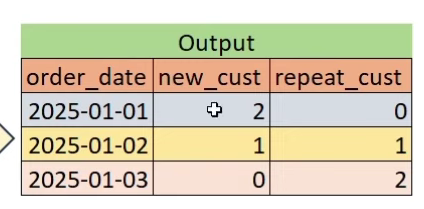

In [ ]:
spark.sql("""
WITH o AS (
    SELECT Order_id, Cust_id, Order_dt
    FROM (
        SELECT *,
               ROW_NUMBER() OVER (
                   PARTITION BY Cust_id, Order_dt
                   ORDER BY Order_dt ASC
               ) AS first_order_dt
        FROM orders
        ORDER BY Order_dt
    ) x
    WHERE first_order_dt = 1
),

new_customers AS (
    SELECT *
    FROM (
        SELECT *,
               ROW_NUMBER() OVER (
                   PARTITION BY Cust_id
                   ORDER BY Order_dt
               ) AS first_order_date
        FROM o
    ) y
    WHERE first_order_date = 1
),

old_customers AS (
    SELECT *
    FROM (
        SELECT *,
               ROW_NUMBER() OVER (
                   PARTITION BY Cust_id
                   ORDER BY Order_dt
               ) AS first_order_date
        FROM o
    ) z
    WHERE first_order_date != 1
),
new as (select Order_dt,count(*) new_customers from new_customers group by Order_dt),
old as (select Order_dt,count(*) old_customers from old_customers group by Order_dt)
select final.Order_dt,COALESCE(new.new_customers,0)as new_cust,COALESCE(old.old_customers,0)as old_cust from (select Order_dt from new union select Order_dt from old) final
left join new On final.Order_dt = new.Order_dt LEFT JOIN old on old.Order_dt = final.Order_dt;
""").show(truncate=False)


+----------+--------+--------+
|Order_dt  |new_cust|old_cust|
+----------+--------+--------+
|2025-01-01|2       |0       |
|2025-01-02|1       |1       |
|2025-01-03|0       |2       |
+----------+--------+--------+



truncate=False means print the complete column values without shortening them.

In [ ]:
spark.sql("""with f as (select cust_id, Order_dt from (select cust_id,Order_dt,count(*) from orders group by Cust_id,Order_dt) ),
fod as (select cust_id,min(Order_dt) as fod from f group by cust_id),

final as (select order_Dt, case when Order_dt = fod then 1 else 0 end as new_c,
case when Order_dt != fod then 1 else 0 end as old_c
 from (select f.cust_id,f.Order_dt,fod.fod from f left join fod on f.cust_id=fod.cust_id))

 select Order_Dt, sum(new_c),sum(old_c) from final group by Order_Dt;
 """).show()

+----------+----------+----------+
|  Order_Dt|sum(new_c)|sum(old_c)|
+----------+----------+----------+
|2025-01-01|         2|         0|
|2025-01-02|         1|         1|
|2025-01-03|         0|         2|
+----------+----------+----------+



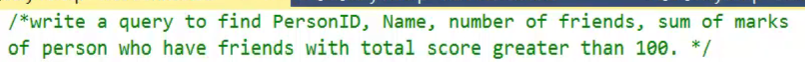

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

# ----------------------
# 1. Person DataFrame
# ----------------------
person_data = [
    (1, "Alice", "alice2018@hotmail.com", 88),
    (2, "Bob", "bob2018@hotmail.com", 11),
    (3, "Davis", "davis2018@hotmail.com", 27),
    (4, "Tara", "tara2018@hotmail.com", 42),
    (5, "John", "john2018@hotmail.com", 63)
]

df_person = spark.createDataFrame(
    person_data,
    ["PersonID", "Name", "Email", "Score"]
)

df_person.show()

# ----------------------
# 2. Friend DataFrame
# ----------------------
friend_data = [
    (1, 2),
    (1, 3),
    (2,1),
    (2, 3),
    (3, 5),
    (4, 2),
    (4, 3),
    (4, 5)
]

df = spark.createDataFrame(friend_data, ["PersonID", "FriendID"])

df_friend = spark.createDataFrame(
    friend_data,
    ["PersonID1", "FriendID"]
)

df_friend.show()


+--------+-----+--------------------+-----+
|PersonID| Name|               Email|Score|
+--------+-----+--------------------+-----+
|       1|Alice|alice2018@hotmail...|   88|
|       2|  Bob| bob2018@hotmail.com|   11|
|       3|Davis|davis2018@hotmail...|   27|
|       4| Tara|tara2018@hotmail.com|   42|
|       5| John|john2018@hotmail.com|   63|
+--------+-----+--------------------+-----+

+---------+--------+
|PersonID1|FriendID|
+---------+--------+
|        1|       2|
|        1|       3|
|        2|       1|
|        2|       3|
|        3|       5|
|        4|       2|
|        4|       3|
|        4|       5|
+---------+--------+



In [ ]:
df_friend.createOrReplaceTempView('friends')
df_person.createOrReplaceTempView('persons')

In [ ]:
spark.sql("""select hey.PersonID1,Sum(Score) as total_marks_friends from (select f.PersonID1,F.FriendID,p.Score from friends f LEFT JOIN
persons p ON f.FriendID=p.PersonID) hey
group by PersonID1
HAVING total_marks_friends >=100
""").show()

+---------+-------------------+
|PersonID1|total_marks_friends|
+---------+-------------------+
|        2|                115|
|        4|                101|
+---------+-------------------+



In [ ]:
df_friend.join(df_person,how='left',on=df_friend.FriendID == df_person.PersonID).select("PersonID1","Score").groupBy('PersonID1').sum('Score').filter("sum(Score)>100").show()

+---------+----------+
|PersonID1|sum(Score)|
+---------+----------+
|        2|       115|
|        4|       101|
+---------+----------+



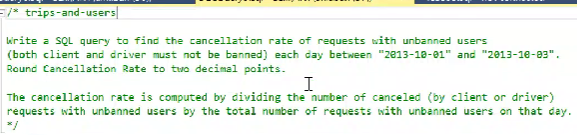

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

# -------------------------
# 1️⃣ Trips DataFrame
# -------------------------

trips_data = [
    (1, 1, 10, 1, "completed", "2013-10-01"),
    (2, 2, 11, 1, "cancelled_by_driver", "2013-10-01"),
    (3, 3, 12, 6, "completed", "2013-10-01"),
    (4, 4, 13, 6, "cancelled_by_client", "2013-10-01"),
    (5, 1, 10, 1, "completed", "2013-10-02"),
    (6, 2, 11, 6, "completed", "2013-10-02"),
    (7, 3, 12, 6, "completed", "2013-10-02"),
    (8, 2, 12, 12, "completed", "2013-10-03"),
    (9, 3, 10, 12, "completed", "2013-10-03"),
    (10, 4, 13, 12, "cancelled_by_driver", "2013-10-03")
]

df_trips = spark.createDataFrame(
    trips_data,
    ["id", "client_id", "driver_id", "city_id", "status", "request_at"]
)
# -------------------------
# 2️⃣ Users DataFrame
# -------------------------

users_data = [
    (1, "No", "client"),
    (2, "Yes", "client"),
    (3, "No", "client"),
    (4, "No", "client"),
    (10, "No", "driver"),
    (11, "No", "driver"),
    (12, "No", "driver"),
    (13, "No", "driver")
]

df_users = spark.createDataFrame(
    users_data,
    ["users_id", "banned", "role"]
)
df_trips.createOrReplaceTempView('rides')
df_users.createOrReplaceTempView('users')
spark.sql("""
SELECT request_at,
SUM(CASE WHEN status in ('cancelled_by_driver','cancelled_by_client') THEN 1 ELSE 0 END) AS Cancelled,
COUNT(*),
ROUND(SUM(CASE WHEN status in ('cancelled_by_driver','cancelled_by_client') THEN 1 ELSE 0 END)/COUNT(*),2) as percentage
FROM rides
LEFT JOIN  users uc ON rides.client_id = uc.users_id
LEFT JOIN  users ud ON rides.driver_id = ud.users_id
WHERE uc.banned='No' and ud.banned='No'
GROUP BY request_at
""").show()

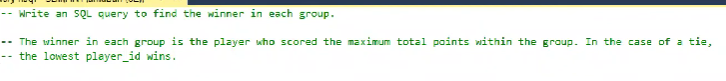

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

# Players table
players_data = [
    (15, 1),
    (25, 1),
    (30, 1),
    (45, 1),
    (10, 2),
    (35, 2),
    (50, 2),
    (20, 3),
    (40, 3)
]

df_players = spark.createDataFrame(
    players_data,
    ["player_id", "group_id"]
)

df_players.show()


+---------+--------+
|player_id|group_id|
+---------+--------+
|       15|       1|
|       25|       1|
|       30|       1|
|       45|       1|
|       10|       2|
|       35|       2|
|       50|       2|
|       20|       3|
|       40|       3|
+---------+--------+



In [ ]:
# Matches table
matches_data = [
    (1, 15, 45, 3, 0),
    (2, 30, 25, 1, 2),
    (3, 30, 15, 2, 0),
    (4, 40, 20, 5, 2),
    (5, 35, 50, 1, 1)
]

df_matches = spark.createDataFrame(
    matches_data,
    ["match_id", "first_player", "second_player", "first_score", "second_score"]
)

df_matches.show()


+--------+------------+-------------+-----------+------------+
|match_id|first_player|second_player|first_score|second_score|
+--------+------------+-------------+-----------+------------+
|       1|          15|           45|          3|           0|
|       2|          30|           25|          1|           2|
|       3|          30|           15|          2|           0|
|       4|          40|           20|          5|           2|
|       5|          35|           50|          1|           1|
+--------+------------+-------------+-----------+------------+



In [ ]:
df_matches.createOrReplaceTempView("matches")
df_players.createOrReplaceTempView('players')

In [ ]:
df_players.show()

+---------+--------+
|player_id|group_id|
+---------+--------+
|       15|       1|
|       25|       1|
|       30|       1|
|       45|       1|
|       10|       2|
|       35|       2|
|       50|       2|
|       20|       3|
|       40|       3|
+---------+--------+



In [ ]:
spark.sql("""
with players_scores as (
select first_player as player_id, first_score as score from matches
UNION ALL select SECOND_player as player_id, SECOND_score as score from matches )
select * fr
(select ps.player_id,sum(ps.score) from players_scores ps LEFT JOIN players p ON ps.player_id=p.player_id
group by ps.player_id) as dummy
""").show()

+---------+----------+
|player_id|sum(score)|
+---------+----------+
|       15|         3|
|       30|         3|
|       35|         1|
|       40|         5|
|       25|         2|
|       45|         0|
|       50|         1|
|       20|         2|
+---------+----------+

